# Bài Lab 2.2 – Lời giải biến đổi BEV 

Notebook này chứa lời giải đầy đủ cho bước biến đổi mask vạch làn sang góc nhìn từ trên (BEV).
Nó tuân theo các bước trong notebook dành cho sinh viên nhưng kèm theo đoạn mã hoàn chỉnh.


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


## Đọc mask vạch làn đã tinh lọc

Hãy thay thế `mask_path` bằng đường dẫn chính xác tới file mask sau bước refine ở Lab 2.1.
Notebook này giả định ảnh mask có giá trị 0 hoặc 255.


In [2]:
# Lưu ý: cần thay đường dẫn này bằng file mask thực tế
mask_path = r"D:\DO_AN_TOT_NGHIEP\SU25\Lab\Lab2_ROI+Morphology+BEV\Lab2.1 ROI + Mask Refinement\result_refine\refined_1765382070.png"
mask_img = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
mask01 = (mask_img > 0).astype(np.uint8)


## Tính ma trận biến đổi phối cảnh

Xác định bộ tỷ lệ nguồn và đích, chuyển chúng sang tọa độ pixel và tính ma trận biến đổi bằng OpenCV.


In [3]:
SRC_RATIOS = np.float32([(0.20, 0.58), (0.10, 0.90), (0.90, 0.90), (0.80, 0.58)])
DST_RATIOS = np.float32([(0.25, 0.00), (0.25, 1.00), (0.75, 1.00), (0.75, 0.00)])

H, W = mask01.shape
src_pts = SRC_RATIOS * np.array([W, H], dtype=np.float32)
dst_pts = DST_RATIOS * np.array([W, H], dtype=np.float32)

M = cv2.getPerspectiveTransform(src_pts, dst_pts)


## Biến đổi mask sang BEV

Sử dụng ma trận `M` để ánh xạ mask vào không gian BEV.
Ảnh mask được nhân 255 trước khi warp và được đưa về dạng nhị phân sau warp.


In [4]:
bev = cv2.warpPerspective(mask01.astype(np.uint8) * 255, M, (W, H), flags=cv2.INTER_NEAREST)
bev_mask = (bev > 0).astype(np.uint8)


## Hiển thị kết quả

Hai biểu đồ dưới đây hiển thị mask sau khi refine và mask sau khi biến đổi sang BEV song song.


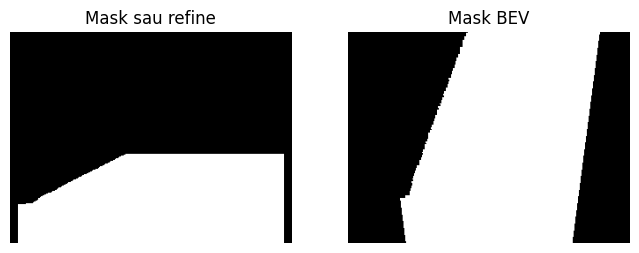

In [5]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title('Mask sau refine')
plt.imshow(mask01, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Mask BEV')
plt.imshow(bev_mask, cmap='gray')
plt.axis('off')

plt.show()
